In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

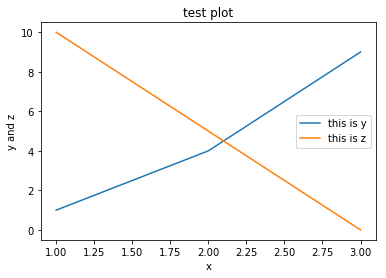

In [3]:
x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 5, 0]
plt.plot(x, y)
plt.plot(x, z)
plt.title("test plot")
plt.xlabel("x")
plt.ylabel("y and z")
plt.legend(["this is y", "this is z"])
plt.show()

In [4]:
sample_data = pd.read_csv('sample_data.csv')

In [5]:
sample_data

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [6]:
sample_data.describe()

,column_a,column_b,column_c
count,5.000000,5.00000,5.000000
mean,3.000000,11.00000,6.000000
std,1.581139,9.66954,3.162278
min,1.000000,1.00000,2.000000
25%,2.000000,4.00000,4.000000
50%,3.000000,9.00000,6.000000
75%,4.000000,16.00000,8.000000
max,5.000000,25.00000,10.000000


In [7]:
type(sample_data)

pandas.core.frame.DataFrame

In [8]:
sample_data.column_c.iloc[0]

10

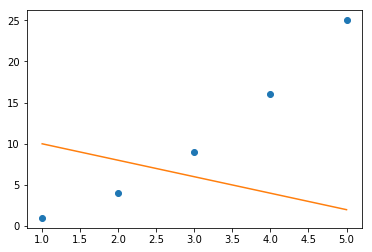

In [9]:
plt.plot(sample_data.column_a, sample_data.column_b, 'o')
plt.plot(sample_data.column_a, sample_data.column_c)
plt.show()

In [10]:
data = pd.read_csv('countries.csv')

In [11]:
data.describe()

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


In [12]:
# Compare the population growth in the US and China

In [13]:
data[data.country == 'United States']

,country,year,population
1608,United States,1952,157553000
1609,United States,1957,171984000
1610,United States,1962,186538000
1611,United States,1967,198712000
1612,United States,1972,209896000
1613,United States,1977,220239000
1614,United States,1982,232187835
1615,United States,1987,242803533
1616,United States,1992,256894189
1617,United States,1997,272911760


In [14]:
#Items including both US and China
data[(data.country == 'United States' ) | (data.country == 'China')].head(5)

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000


In [15]:
#Items that don't contain 'United'
data.loc[~data.country.str.contains('United')].head(5)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [16]:
#Use Regular Expression to filter items
import re
data[data['country'].str.contains('united|south', regex=True, flags=re.I)].reset_index(drop=True).head(5)

,country,year,population
0,South Africa,1952,14264935
1,South Africa,1957,16151549
2,South Africa,1962,18356657
3,South Africa,1967,20997321
4,South Africa,1972,23935810


In [17]:
us = data[data.country == 'United States']

In [18]:
china = data[data.country == 'China']

In [19]:
china

,country,year,population
288,China,1952,556263527
289,China,1957,637408000
290,China,1962,665770000
291,China,1967,754550000
292,China,1972,862030000
293,China,1977,943455000
294,China,1982,1000281000
295,China,1987,1084035000
296,China,1992,1164970000
297,China,1997,1230075000


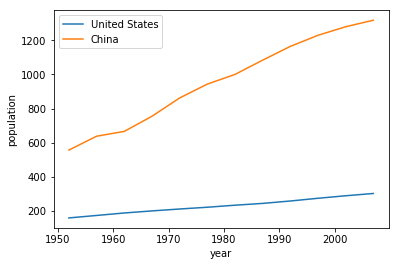

In [20]:
plt.plot(us.year, us.population / 10**6)
plt.plot(china.year, china.population / 10**6)
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population')
plt.show()

In [21]:
us.population

1608    157553000
1609    171984000
1610    186538000
1611    198712000
1612    209896000
1613    220239000
1614    232187835
1615    242803533
1616    256894189
1617    272911760
1618    287675526
1619    301139947
Name: population, dtype: int64

In [22]:
us.population / us.population.iloc[0] * 100

1608    100.000000
1609    109.159457
1610    118.396984
1611    126.123908
1612    133.222471
1613    139.787246
1614    147.371256
1615    154.109114
1616    163.052553
1617    173.219018
1618    182.589685
1619    191.135648
Name: population, dtype: float64

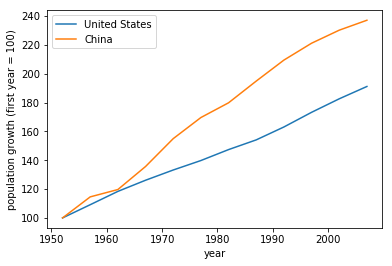

In [23]:
plt.plot(us.year, us.population / us.population.iloc[0] * 100)
plt.plot(china.year, china.population / china.population.iloc[0] * 100)
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

In [24]:
# other functions

In [25]:
data = data.sort_values(['year','population'], ascending=[0,1])
data = data.reset_index(drop=True)
data.head(5)

,country,year,population
0,Sao Tome and Principe,2007,199579
1,Iceland,2007,301931
2,Djibouti,2007,496374
3,Equatorial Guinea,2007,551201
4,Montenegro,2007,684736


In [26]:
data['newPopulation'] = data['population'] * 1.15

In [27]:
#write to file
data.to_csv('modified.csv', index=False)
data.head(5)

,country,year,population,newPopulation
0,Sao Tome and Principe,2007,199579,229515.85
1,Iceland,2007,301931,347220.65
2,Djibouti,2007,496374,570830.10
3,Equatorial Guinea,2007,551201,633881.15
4,Montenegro,2007,684736,787446.40


In [28]:
data = data.drop(columns='newPopulation')

In [29]:
data.head(5)

,country,year,population
0,Sao Tome and Principe,2007,199579
1,Iceland,2007,301931
2,Djibouti,2007,496374
3,Equatorial Guinea,2007,551201
4,Montenegro,2007,684736


In [30]:
#total population
data.loc[:,'population'].sum(axis=0)
data.iloc[:,2].sum(axis=0)

50440465801

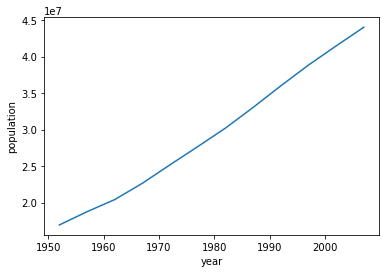

In [31]:
#group by, average population by year
avepop = data.sort_values('year', ascending=0).groupby('year').mean()

plt.plot(avepop.loc[:,'population'])
plt.xlabel('year')
plt.ylabel('population')
plt.show()
